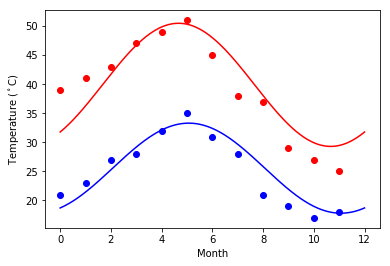

In [8]:
#Assignment 10.1
"""
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
"""
#importing important libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
%matplotlib inline

# 1. fitting it to the periodic function
max_temp= np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])# list of min_temp each months over a year
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])# list of max_temp each months over a year

# months of a year 0---11
months = np.arange(12)

# periodic function which is used for fitting
def yearly_temps(time, a, b, c): 
    return (a + b * np.cos((time + c) * 2 * np.pi / time.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months, max_temp, [10, 10, 0])# res_max is optimized value of the param a,b,c 
res_min, cov_min = optimize.curve_fit(yearly_temps, months, min_temp, [10, 20, 0])# res_min is optimized value of the param a,b,c

days = np.linspace(0, 12, num=365) # days of year indexing from 0----365

# plot the fitting curve for max_temp
plt.plot(months, max_temp, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')


# plot the fitting curve for min_temp
plt.plot(months, min_temp, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')

# labelling the plot
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

In [73]:
# Assignment 10.2
"""
An example on matplotlib
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
"""

# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt

url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)# reading the csv file to a dataframe
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


sex
female    466
male      843
Name: name, dtype: int64


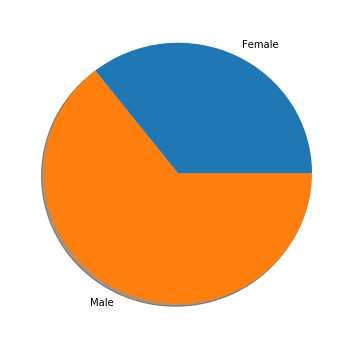

In [74]:
# Assignment 10.2 (continued)
"""
Create a pie chart presenting the male/female proportion
"""
sex = titanic.groupby('sex').count() # grouping the sex column and getting the count
labels = 'Female', 'Male' # labels for the pie chart
print(sex['name'])
plt.figure(figsize=(6,6)) # size of the plot
plt.pie(sex['name'].values,labels=labels,shadow=True) # plotting the count value of sex in form of pie chart
plt.show()


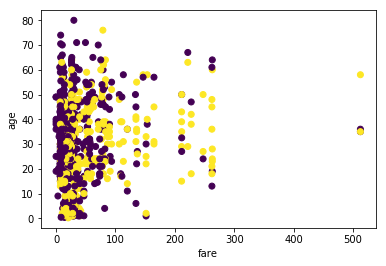

In [75]:
# Assignment 10.2 (continued)
"""
Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
"""

sex=np.zeros(len(titanic)).astype(int) # list of encoded sex_char list 0--->'male' 1-->'female'

sex_char=titanic['sex'].values # list of sex value like 'male' or 'female'

for i in range(len(sex_char)): #encoding the sex_char into sex list
    if(sex_char[i]=='male'):
        sex[i]=0
    else:
        sex[i]=1
   
plt.scatter(titanic['fare'].values,titanic['age'].values,c=sex) # plotting the age vs fare in the scatter plot
plt.xlabel('fare') # labelling the x axis
plt.ylabel('age') # labelling the y axis
plt.show()